In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# Dataset

In [2]:
x, y = make_regression(n_samples=100, n_features=1, noise=10)

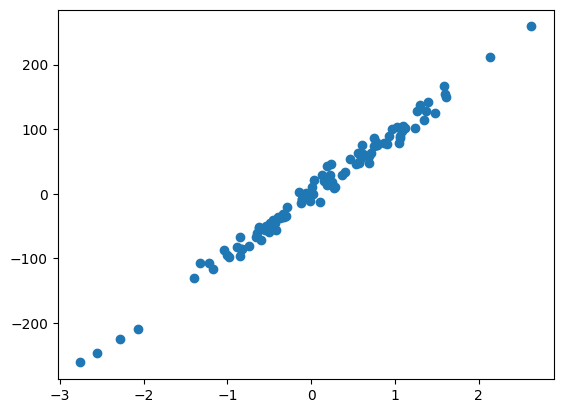

In [3]:
plt.scatter(x, y)

In [4]:
print(x.shape)

y = y.reshape((x.shape[0], 1))
print(y.shape)

(100, 1)
(100, 1)


In [5]:
X = np.hstack((x, np.ones(x.shape)))
X[:5]

array([[-0.97976209,  1.        ],
       [ 0.00444013,  1.        ],
       [ 0.61748898,  1.        ],
       [ 1.58565834,  1.        ],
       [ 0.46317535,  1.        ]])

In [6]:
theta = np.random.randn(2, 1)
print(theta)

[[-1.89916695]
 [-1.68330778]]


# Modèle

In [7]:
def model(X_, theta_):
    return X_.dot(theta_)

In [8]:
model(X, theta)[:5]

array([[ 0.177424  ],
       [-1.69174032],
       [-2.85602244],
       [-4.69473768],
       [-2.5629551 ]])

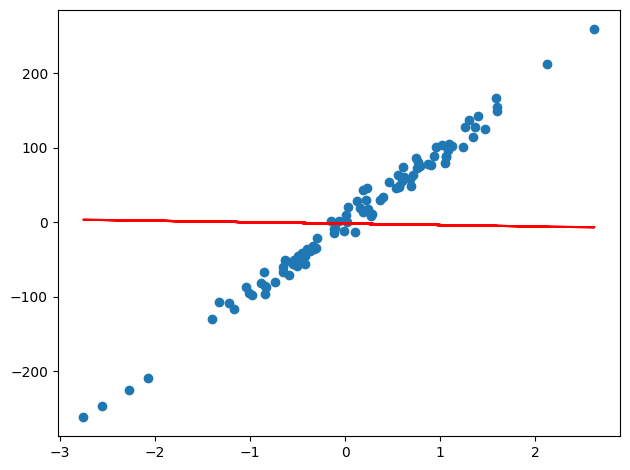

In [9]:
plt.scatter(x, y)
plt.plot(x, model(X, theta), color="red")
plt.tight_layout()
plt.show()

# Fonction coût

In [10]:
def cost_function(X_, y_, theta_):
    m = len(y_)
    return 1/2*m + np.sum((model(X_, theta_) - y_)**2)

In [11]:
cost_function(X, y, theta)

np.float64(909749.6436075025)

# Gradient

In [12]:
def grad(X_, y_, theta_):
    m = len(y_)
    return 1/m * X_.transpose().dot(model(X_, theta_) - y_)

# Descente de gradient

In [13]:
def descent_grad(X_, y_, theta_, leaning_rate, n_iteration):
    cost_history_ = np.zeros(n_iteration)
    for i in range(0, n_iteration):
        theta_ = theta_ - leaning_rate * grad(X_, y_, theta_)
        cost_history_[i] = cost_function(X_, y_, theta_)
    return theta_, cost_history_

# Entraînement du modèle

In [14]:
theta_final, cost_history = descent_grad(X, y, theta, leaning_rate=0.01, n_iteration=500)
theta_final

array([[94.57352169],
       [ 0.13370247]])

In [15]:
predictions = model(X, theta_final)

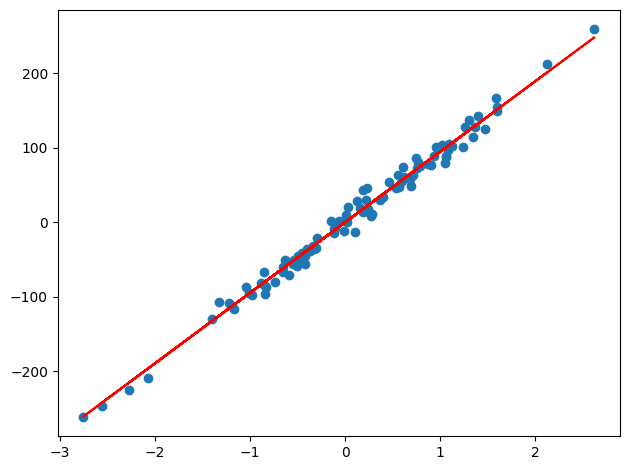

In [16]:
plt.scatter(x, y)
plt.plot(x, predictions, color="red")
plt.tight_layout()
plt.show()

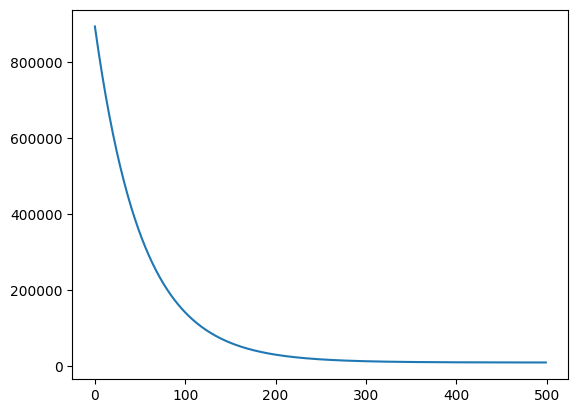

In [17]:
plt.plot(range(500), cost_history)

# Coéfficient de détermination R²

In [18]:
def coef_determination(y_, pred):
    u = np.sum((y_ - pred)**2)
    v = np.sum((y_ - y_.mean())**2)
    return 1 - u/v

In [19]:
coef_determination(y, predictions)

np.float64(0.9884200763654131)